<h1 align="center" style="color:Blue"><b style="font-size:36px">Цепочки осцилляторов</b></h1><br/>

<div><img src="Images/OscChain.png" width=75% align="center" style="position: relative;"/></div>
<div align="center">Рис.1. Цепочка осцилляторов</div>

Рассмотрим цепочку осцилляторов (рис.1), состоящую из $n$ масс соединенных пружинами и демпферами. Постоянные упругости пружин обозначены $C_{i,i+1}$, а постоянные демпфирования $B_{i,i+1}$.

Сила упругого взаимодействия (сила от действия пружин) $$U_{ij} = C_{ij}(x_{j} - x_{i}),$$ где $C_{ij}$ - постоянная упругости (жесткость) пружины, а $x_{i}$ и $x_{j}$ координаты масс i и j.

Сила вязкого сопротивления (сила от действия демпферов) $$D_{ij} = B_{ij}(v_{j} - v_{i}),$$ где $B_{ij}$ - постоянная демпфирования, а $v_{i}$ и $v_{j}$ скорости масс i и j.

Суммарная сила  $$F_{ij} = U_{ij} + D_{ij} = C_{ij}(x_{j} - x_{i}) + B_{ij}(v_{j} - v_{i}).$$


# Система уравнений динамики цепочки осцилляторов

Динамика цепочки, представленной на рисунке 1, описывается системой обыкновенных дифференциальных уравнений вида

\begin{eqnarray}
m_{1} \cdot \frac{d^{2}x_{1}}{dt^{2}} = - C_{1} \cdot \left( x_{2} - x_{1} \right) - B_{1} \cdot \left( v_{2} - v_{1} \right) \\ 
\\
\\
\\
\cdots \\
m_{i} \cdot \frac{d^{2}x_{i}}{dt^{2}} = - C_{i} \cdot \left( x_{i} - x_{i-1} \right) - B_{i} \cdot \left( v_{i} - v_{i-1} \right) \\
- C_{i+1} \cdot \left( x_{i+1} - x_{i} \right) - B_{i+1} \cdot \left( v_{i+1} - v_{i} \right) \\ 
\\
\\
\\
\cdots \\
m_{n} \cdot \frac{d^{2}x_{n}}{dt^{2}} = - C_{n} \cdot \left( x_{n} - x_{n-1} \right) - B_{n} \cdot \left( v_{n} - v_{n-1} \right)
\end{eqnarray}
В приведенных выше уравнениях у констант сохранены только индексы, совпадающие с индексами соответствующих масс.

## Пример №1: Цепочка осцилляторов без демпфирования

В качестве первого примера рассмотрим случай отсутствия демпфирования, т.е. все $B_{i}$ равны нулю. Ось $x$ направлена вертикально в верх. Цепочка из 5-ти одинаковых масс, соединенных одинаковыми пружинами длины $l$ и жесткостью $C$, падает вертикально с некоторой высоты $x_{0}$, на все массы действует сила тяжести $-mg$. Для обеспечения отскока от горизонтальной поверхности введем силу с константой упругоcти $C_{s}$.  

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os, sys, glob

In [57]:
# Число масс в цепочке
N = 10
# Константа демпфирования
B = 0
# Жесткость пружин 
C = 100
# Жесткость основания
Cs = 1000
# Размер цепочки в м
d = 1.25 
# Массы в кг
m = 0.1
# Время моделирования 
t = 3.0 
# Ускорение свободного падения
g = 9.81 
# Высота падения 
x0 = 0.5 
# Шаг интегрирования по времени
dt = 1E-6 
# Количество шагов по времени
nstep = int(t/dt)
# Массив времени
time = np.linspace(0,t,nstep)
# Массив положений масс
x = np.zeros((N,nstep+1),float)
# Массив скоростей масс
vx = np.zeros((N,nstep+1),float)
# Начальные положения масс
x[:,0] = d*(np.array(range(N)))/N+x0
# Расновесные расстояния между массами, т.е. пружины не растянуты и не сжаты
l = d/N 

In [36]:
Curr_Path = os.getcwd()
print(Curr_Path)
Results_Path = os.path.join(Curr_Path,'Results')
print(Results_Path)
os.makedirs(Results_Path,mode=0o777, exist_ok=True)

FName0 = f"Model_N_{N}_B_{B}_C_{C}_t_{t}"
FPath = os.path.join(Results_Path,f"Model_N_{N}_B_{B}_C_{C}_t_{t}")
os.makedirs(FPath,mode=0o777, exist_ok=True)
print(FPath)

/Users/collapsor/PycharmProjects/Taichi_project
/Users/collapsor/PycharmProjects/Taichi_project/Results
/Users/collapsor/PycharmProjects/Taichi_project/Results/Model_N_5_B_0_C_100_t_3.0


In [38]:
time

array([0.00000000e+00, 1.00000033e-06, 2.00000067e-06, ...,
       2.99999800e+00, 2.99999900e+00, 3.00000000e+00])

In [37]:
print(x)
print(x.shape)

[[0.5  0.   0.   ... 0.   0.   0.  ]
 [0.75 0.   0.   ... 0.   0.   0.  ]
 [1.   0.   0.   ... 0.   0.   0.  ]
 [1.25 0.   0.   ... 0.   0.   0.  ]
 [1.5  0.   0.   ... 0.   0.   0.  ]]
(5, 3000001)


In [58]:
# Вычисляем перемещения масс
import time as pytime
start = pytime.time()
for i in range(nstep): 
    # print(f'STEP: {i}')
    dx = np.diff(x[:,i])-l
    F = -C*np.append(0.0,dx) + C*np.append(dx,0.0) - m*g
    F[0] = F[0] - Cs*x[0,i]*(x[0,i]<0)
    a = F/m
    vx[:,i+1] = vx[:,i] + a*dt
    x[:,i+1] = x[:,i] + vx[:,i+1]*dt
print(pytime.time()-start)

24.828528881072998


In [54]:
vx[0]

array([ 0.00000000e+00, -9.81000000e-06, -1.96200000e-05, ...,
       -2.22742741e+00, -2.22741448e+00, -2.22740154e+00])

In [53]:
x[0,600:610]

array([0.49999823, 0.49999823, 0.49999822, 0.49999821, 0.49999821,
       0.4999982 , 0.4999982 , 0.49999819, 0.49999818, 0.49999818])

In [16]:
dx = np.diff(x[:,0])-l
F = -C*np.append(0.0,dx) + C*np.append(dx,0.0) - m*g
print(dx,F)

[0. 0. 0. 0.] [-0.981 -0.981 -0.981 -0.981 -0.981]


In [10]:
x.shape

(5, 3000001)

In [18]:
np.diff(x[:,1])

array([0.25, 0.25, 0.25, 0.25])

In [23]:
dx = np.diff(x[:,1])-l
print(dx)

[-5.55111512e-17  0.00000000e+00  1.11022302e-16  0.00000000e+00]


In [24]:
np.append(0.0,dx)

array([ 0.00000000e+00, -5.55111512e-17,  0.00000000e+00,  1.11022302e-16,
        0.00000000e+00])

In [12]:
print(x)

[[0.5        0.5        0.5        ... 0.01715003 0.01714878 0.01714753]
 [0.75       0.75       0.75       ... 0.27887334 0.27887354 0.27887374]
 [1.         1.         1.         ... 0.37432392 0.37432181 0.37431969]
 [1.25       1.25       1.25       ... 0.53714688 0.53714584 0.5371448 ]
 [1.5        1.5        1.5        ... 0.67950931 0.67950604 0.67950276]]


In [41]:
step = int(x.shape[1]/1000)
for j in range(0,int(x.shape[1])+1,step):
#for j in range(0,1000+1,1):
    plt.figure(figsize=(2,6))
    plt.ylim(x[0,:].min(),x[-1,:].max())
    # print(f'STEP: {j}')
    #plt.title(f'STEP: {j}',fontsize=16)
    plt.title(f'Время: {j*dt:.2e}',fontsize=16)
    plt.scatter(np.ones(x.shape[0]),x[:,j])
    plt.savefig(os.path.join(FPath,"%020d.png" % j), dpi=300, bbox_inches='tight')
    plt.close()
    #sys.exit()


In [31]:
#fp_in = f"PIC/*.png"
#fp_out = f'PIC/ResNBody.gif'
fp_in = os.path.join(FPath,"*.png")
fp_out = os.path.join(FPath,FName0+".gif")

img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, optimize=False, duration=20, loop=0)

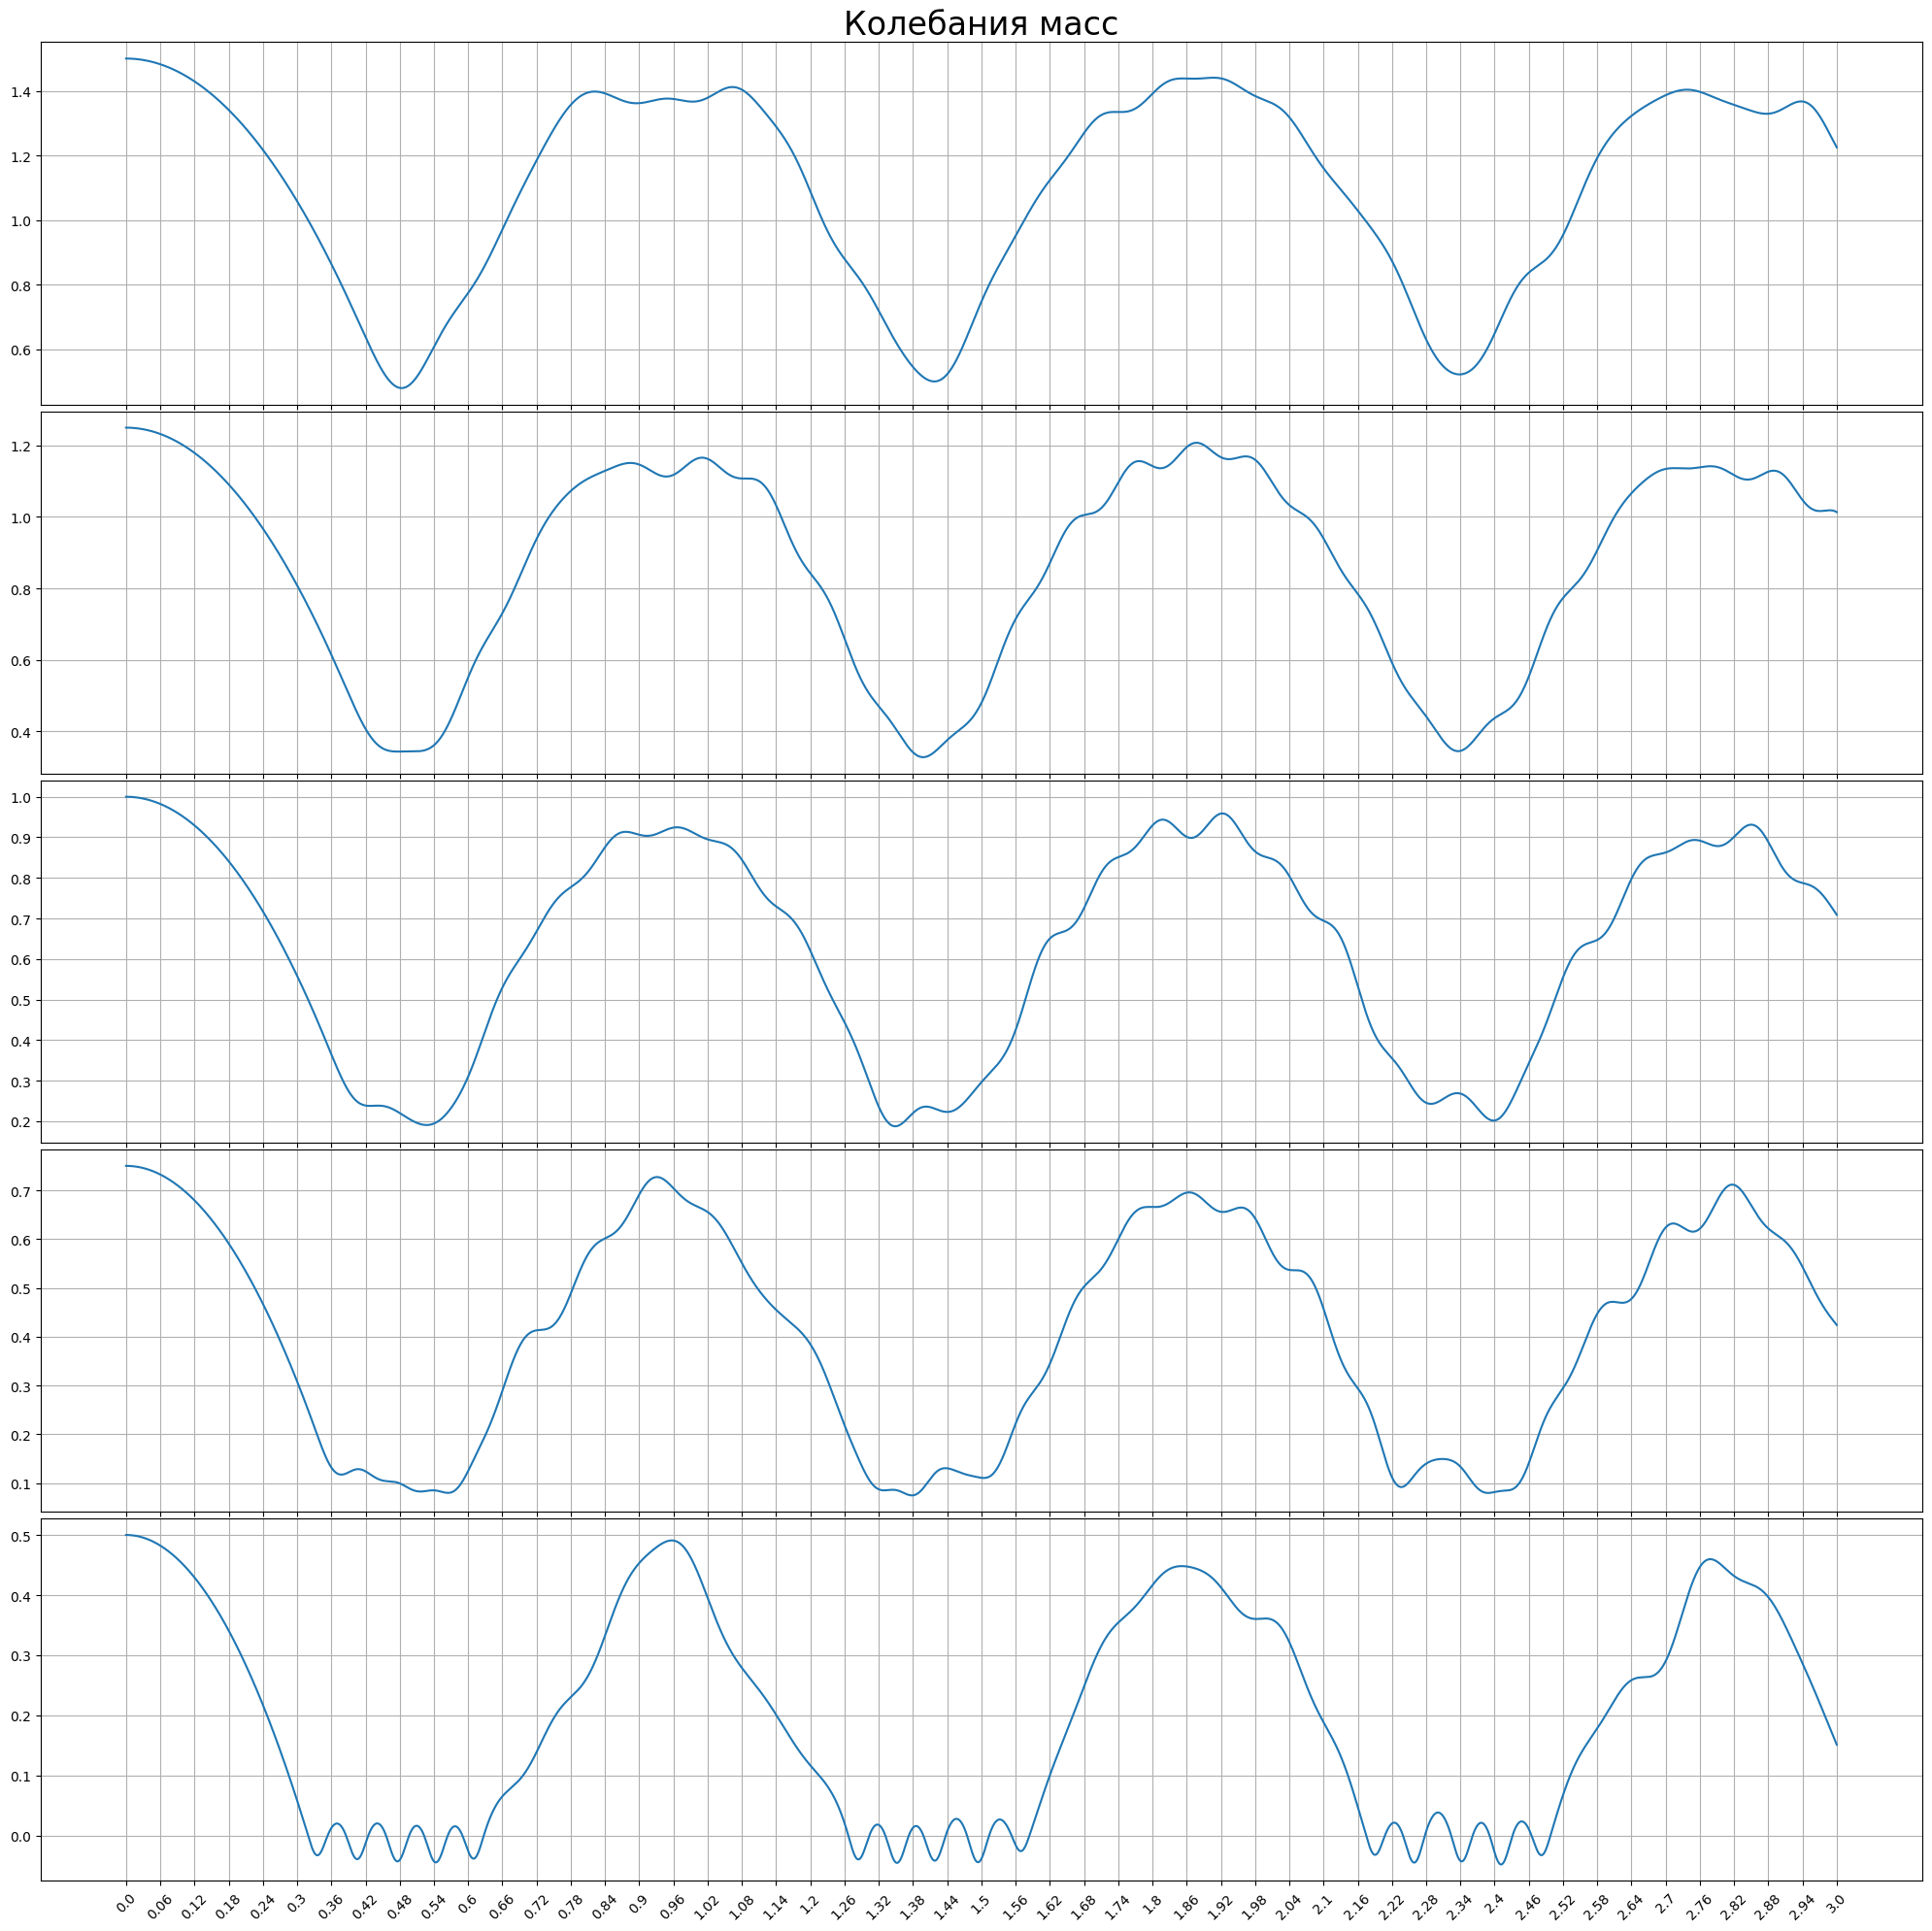

In [42]:
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(511)
ax1.set_title(u'Колебания масс', fontsize=24)
ax1.plot(time,x[4,0:-1])
ax1.set_xticks(np.round(np.linspace(0,t,51),decimals=2))
ax1.set_xticklabels(list(np.round(np.linspace(0,t,51),decimals=2)),fontsize=10,rotation=45)
ax2 = fig.add_subplot(512)
ax2.plot(time,x[3,0:-1])
ax2.set_xticks(np.round(np.linspace(0,t,51),decimals=2))
ax2.set_xticklabels(list(np.round(np.linspace(0,t,51),decimals=2)),fontsize=10,rotation=45)
ax3 = fig.add_subplot(513)
ax3.plot(time,x[2,0:-1])
ax3.set_xticks(np.round(np.linspace(0,t,51),decimals=2))
ax3.set_xticklabels(list(np.round(np.linspace(0,t,51),decimals=2)),fontsize=10,rotation=45)
ax4 = fig.add_subplot(514)
ax4.plot(time,x[1,0:-1])
ax4.set_xticks(np.round(np.linspace(0,t,51),decimals=2))
ax4.set_xticklabels(list(np.round(np.linspace(0,t,51),decimals=2)),fontsize=10,rotation=45)
ax5 = fig.add_subplot(515)
ax5.plot(time,x[0,0:-1])
ax5.set_xticks(np.round(np.linspace(0,t,51),decimals=2))
ax5.set_xticklabels(list(np.round(np.linspace(0,t,51),decimals=2)),fontsize=10,rotation=45)

for ax in fig.axes:
    ax.grid(True)

plt.tight_layout(h_pad = -2.5)

plt.savefig(os.path.join(FPath,FName0+".png"), dpi=600, bbox_inches='tight')

plt.show()

## ОБЯЗАТЕЛЬНО СДЕЛАТЬ Restart the Kernel !!!

## Пример №2: Цепочка осцилляторов с демпфированием

В качестве второго примера рассмотрим случай с демпфированием. Ось $x$ направлена вертикально в верх. Цепочка из 5-ти одинаковых масс, соединенных одинаковыми пружинами длины $l$ и жесткостью $C$, падает вертикально с некоторой высоты $x_{0}$, на все массы действует сила тяжести $-mg$. Для обеспечения отскока от горизонтальной поверхности введем силу с константой упругоcти $C_{s}$.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os, sys, glob

In [2]:
# Число масс в цепочке
N = 5
# Константа демпфирования
B = 5
# Жесткость пружин 
C = 100
# Жесткость основания
Cs = 1000000 
# Размер цепочки в м
d = 1.25 
# Массы в кг
m = 0.1
# Время моделирования 
t = 3.0 
# Ускорение свободного падения
g = 9.81 
# Высота падения 
x0 = 0.5 
# Шаг интегрирования по времени
dt = 1E-6 
# Количество шагов по времени
nstep = int(t/dt)
# Массив времени
time = np.linspace(0,t,nstep)
# Массив положений масс
x = np.zeros((N,nstep+1),float)
# Массив скоростей масс
vx = np.zeros((N,nstep+1),float)
# Начальные положения масс
x[:,0] = d*(np.array(range(N)))/N+x0
# Расновесные расстояния между массами, т.е. пружины не растянуты и не сжаты
l = d/N 

In [3]:
Curr_Path = os.getcwd()
print(Curr_Path)
Results_Path = os.path.join(Curr_Path,'Results')
print(Results_Path)
os.makedirs(Results_Path,mode=0o777, exist_ok=True)

FName0 = f"Model_N_{N}_B_{B}_C_{C}_t_{t}"
FPath = os.path.join(Results_Path,f"Model_N_{N}_B_{B}_C_{C}_t_{t}")
os.makedirs(FPath,mode=0o777, exist_ok=True)
print(FPath)

/home/hpcuser/work_spaces/msa-2024/Disk_18TB/WORK_SPACES/MGU_SEMINAR/ShiHui/14_03_2025
/home/hpcuser/work_spaces/msa-2024/Disk_18TB/WORK_SPACES/MGU_SEMINAR/ShiHui/14_03_2025/Results
/home/hpcuser/work_spaces/msa-2024/Disk_18TB/WORK_SPACES/MGU_SEMINAR/ShiHui/14_03_2025/Results/Model_N_5_B_5_C_100_t_3.0


In [14]:
# Вычисляем перемещения масс
for i in range(nstep): 
    if i % 1000 == 0:
        print(f'STEP: {i}')
    dx = np.diff(x[:,i])-l
    dv = np.diff(vx[:,i])
    F = -C*np.append(0.0,dx) + C*np.append(dx,0.0) - B*np.append(0.0,dv) + B*np.append(dv,0.0) - m*g
    F[0] = F[0] - Cs*x[0,i]*(x[0,i]<0)
    a = F/m
    vx[:,i+1] = vx[:,i] + a*dt
    x[:,i+1] = x[:,i] + vx[:,i+1]*dt

STEP: 0
STEP: 1000
STEP: 2000
STEP: 3000
STEP: 4000
STEP: 5000
STEP: 6000
STEP: 7000
STEP: 8000
STEP: 9000
STEP: 10000
STEP: 11000
STEP: 12000
STEP: 13000
STEP: 14000
STEP: 15000
STEP: 16000
STEP: 17000
STEP: 18000
STEP: 19000
STEP: 20000
STEP: 21000
STEP: 22000
STEP: 23000
STEP: 24000
STEP: 25000
STEP: 26000
STEP: 27000
STEP: 28000
STEP: 29000
STEP: 30000
STEP: 31000
STEP: 32000
STEP: 33000
STEP: 34000
STEP: 35000
STEP: 36000
STEP: 37000
STEP: 38000
STEP: 39000
STEP: 40000
STEP: 41000
STEP: 42000
STEP: 43000
STEP: 44000
STEP: 45000
STEP: 46000
STEP: 47000
STEP: 48000
STEP: 49000
STEP: 50000
STEP: 51000
STEP: 52000
STEP: 53000
STEP: 54000
STEP: 55000
STEP: 56000
STEP: 57000
STEP: 58000
STEP: 59000
STEP: 60000
STEP: 61000
STEP: 62000
STEP: 63000
STEP: 64000
STEP: 65000
STEP: 66000
STEP: 67000
STEP: 68000
STEP: 69000
STEP: 70000
STEP: 71000
STEP: 72000
STEP: 73000
STEP: 74000
STEP: 75000
STEP: 76000
STEP: 77000
STEP: 78000
STEP: 79000
STEP: 80000
STEP: 81000
STEP: 82000
STEP: 83000
STEP:

In [15]:
x.shape

(5, 3000001)

In [16]:
step = int(x.shape[1]/1000)
for j in range(0,int(x.shape[1])+1,step):
#for j in range(0,1000+1,1):
    plt.figure(figsize=(2,6))
    plt.ylim(x[0,:].min(),x[-1,:].max())
    print(f'STEP: {j}')
    #plt.title(f'STEP: {j}',fontsize=16)
    plt.title(f'Время: {j*dt:.2e}',fontsize=16)
    plt.scatter(np.ones(x.shape[0]),x[:,j])
    plt.savefig(os.path.join(FPath,"%020d.png" % j), dpi=300, bbox_inches='tight')
    plt.close()
    #sys.exit()


STEP: 0
STEP: 3000
STEP: 6000
STEP: 9000
STEP: 12000
STEP: 15000
STEP: 18000
STEP: 21000
STEP: 24000
STEP: 27000
STEP: 30000
STEP: 33000
STEP: 36000
STEP: 39000
STEP: 42000
STEP: 45000
STEP: 48000
STEP: 51000
STEP: 54000
STEP: 57000
STEP: 60000
STEP: 63000
STEP: 66000
STEP: 69000
STEP: 72000
STEP: 75000
STEP: 78000
STEP: 81000
STEP: 84000
STEP: 87000
STEP: 90000
STEP: 93000
STEP: 96000
STEP: 99000
STEP: 102000
STEP: 105000
STEP: 108000
STEP: 111000
STEP: 114000
STEP: 117000
STEP: 120000
STEP: 123000
STEP: 126000
STEP: 129000
STEP: 132000
STEP: 135000
STEP: 138000
STEP: 141000
STEP: 144000
STEP: 147000
STEP: 150000
STEP: 153000
STEP: 156000
STEP: 159000
STEP: 162000
STEP: 165000
STEP: 168000
STEP: 171000
STEP: 174000
STEP: 177000
STEP: 180000
STEP: 183000
STEP: 186000
STEP: 189000
STEP: 192000
STEP: 195000
STEP: 198000
STEP: 201000
STEP: 204000
STEP: 207000
STEP: 210000
STEP: 213000
STEP: 216000
STEP: 219000
STEP: 222000
STEP: 225000
STEP: 228000
STEP: 231000
STEP: 234000
STEP: 237000
S

In [17]:
#fp_in = f"PIC/*.png"
#fp_out = f'PIC/ResNBody.gif'
fp_in = os.path.join(FPath,"*.png")
fp_out = os.path.join(FPath,FName0+".gif")

img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, optimize=False, duration=20, loop=0)

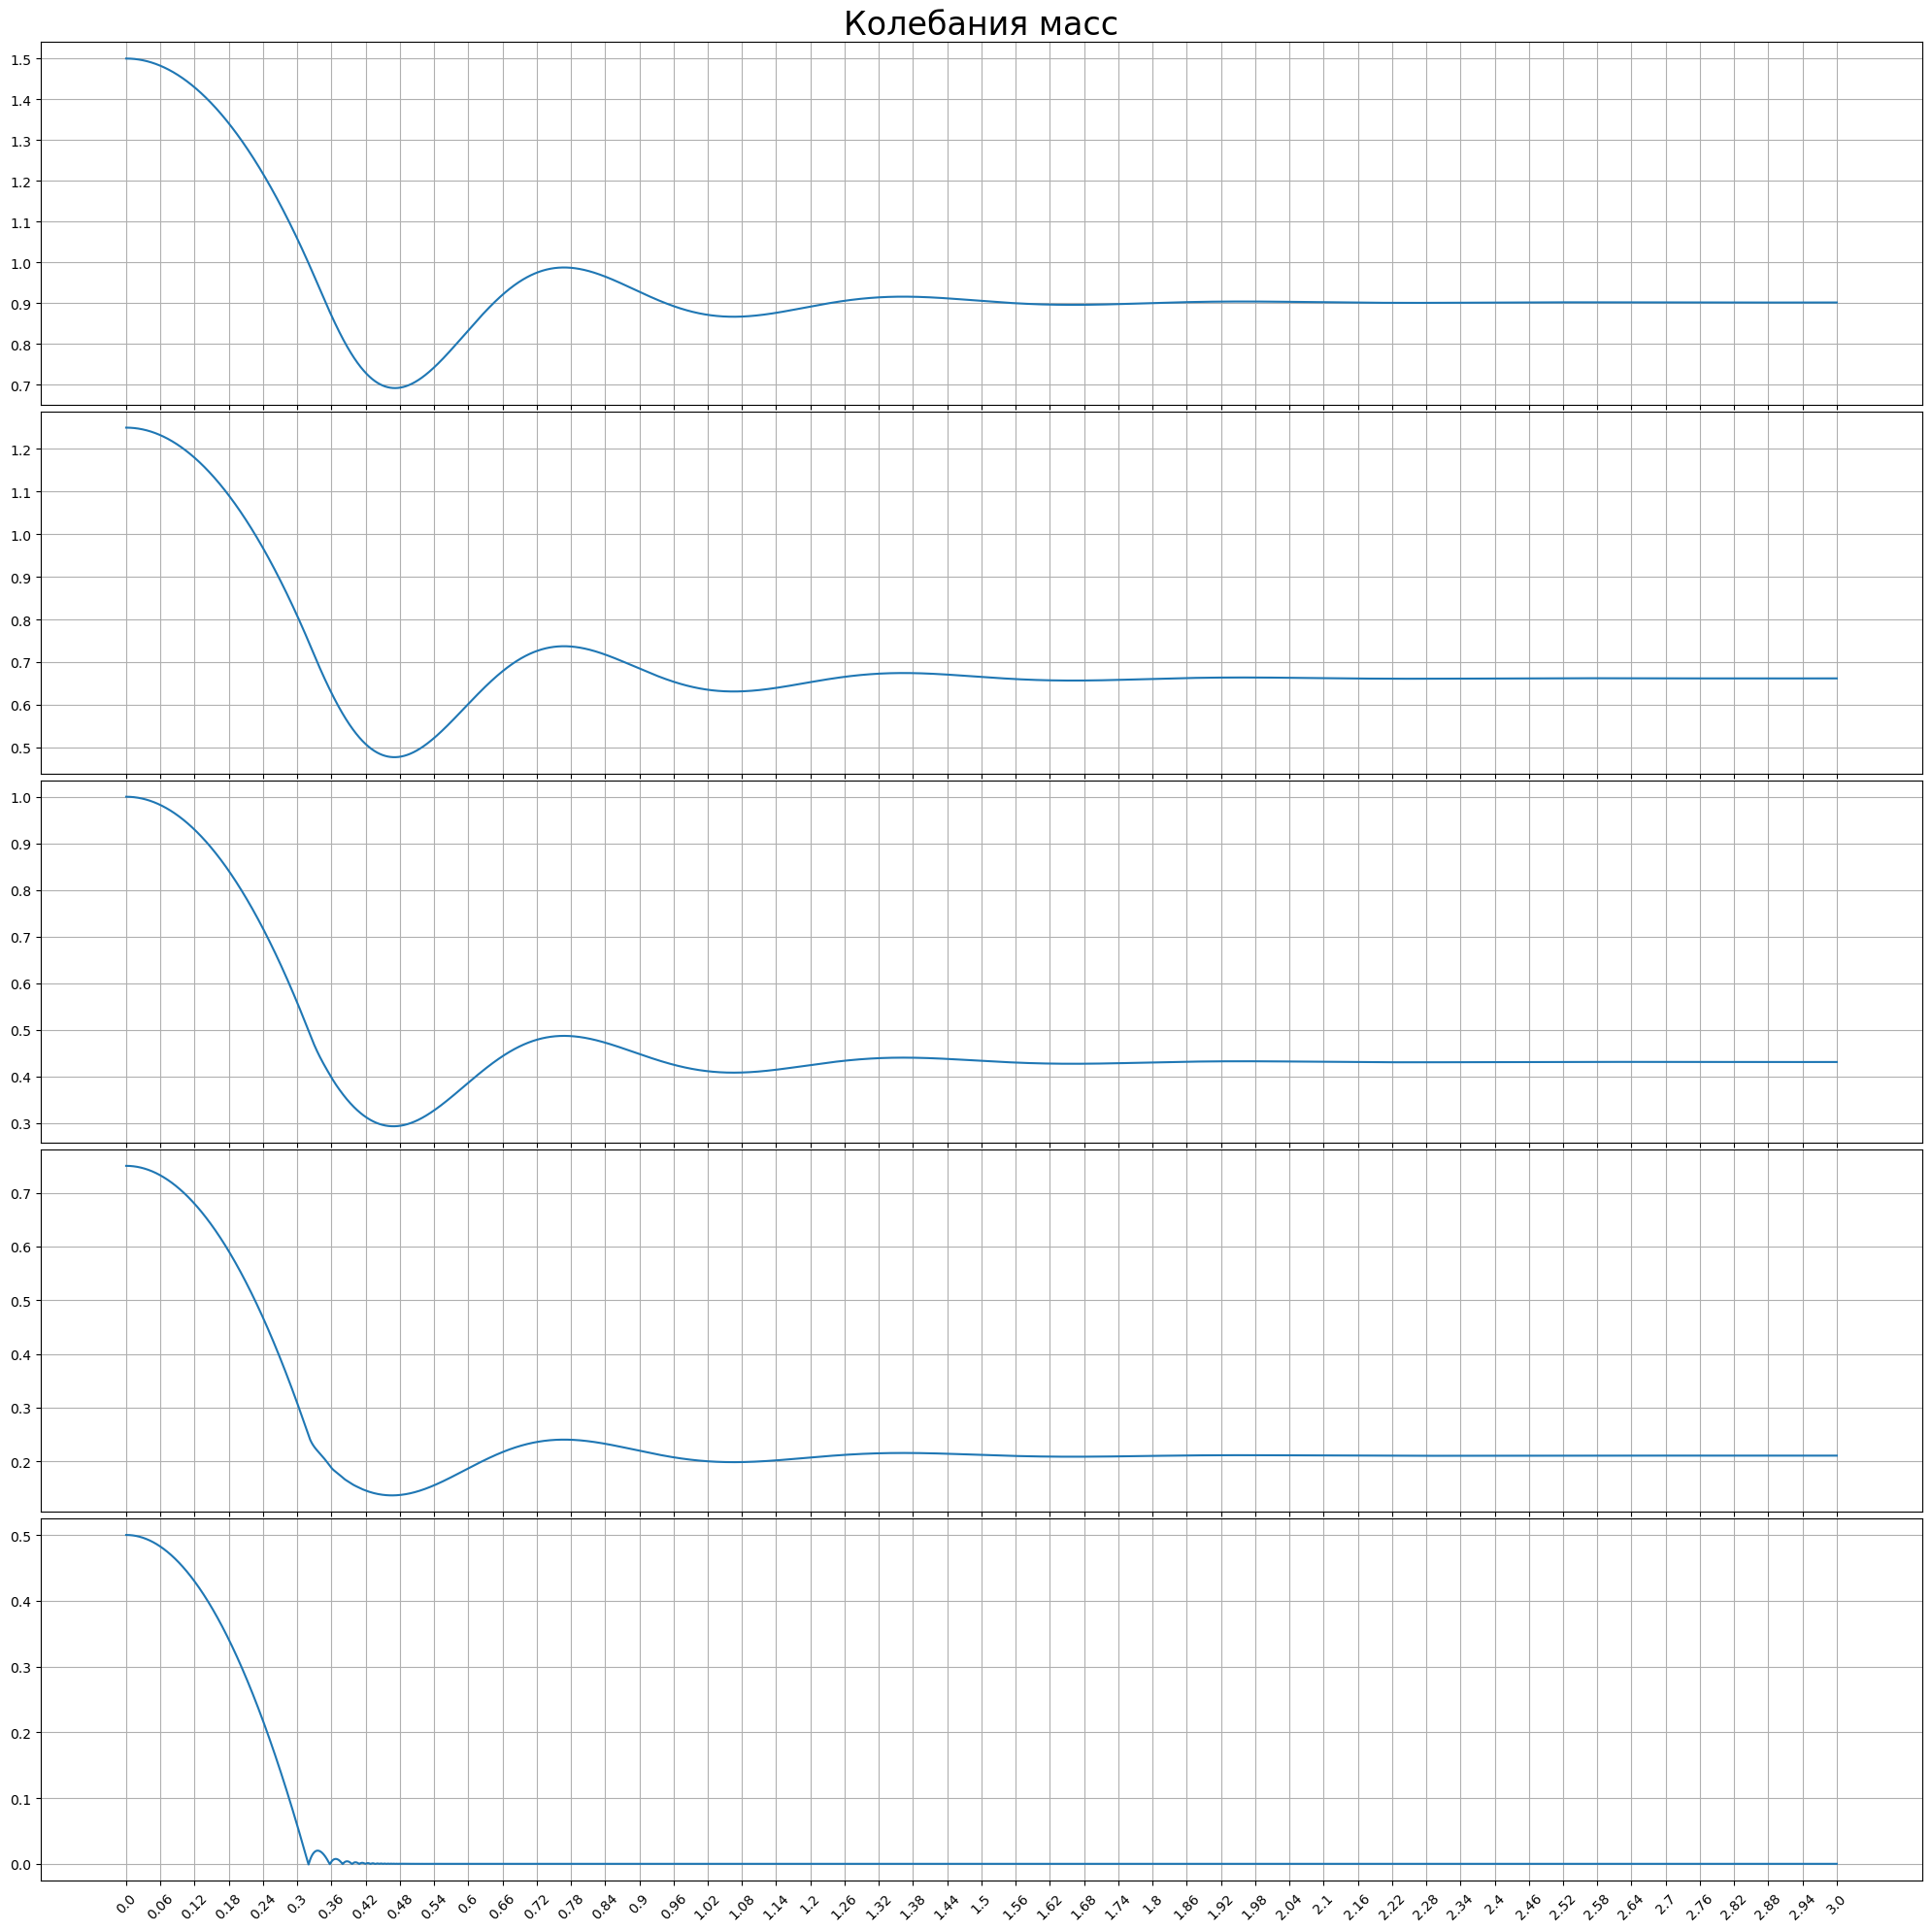

In [19]:
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(511)
ax1.set_title(u'Колебания масс', fontsize=24)
ax1.plot(time,x[4,0:-1])
ax1.set_xticks(np.round(np.linspace(0,t,51),decimals=2))
ax1.set_xticklabels(list(np.round(np.linspace(0,t,51),decimals=2)),fontsize=10,rotation=45)
ax2 = fig.add_subplot(512)
ax2.plot(time,x[3,0:-1])
ax2.set_xticks(np.round(np.linspace(0,t,51),decimals=2))
ax2.set_xticklabels(list(np.round(np.linspace(0,t,51),decimals=2)),fontsize=10,rotation=45)
ax3 = fig.add_subplot(513)
ax3.plot(time,x[2,0:-1])
ax3.set_xticks(np.round(np.linspace(0,t,51),decimals=2))
ax3.set_xticklabels(list(np.round(np.linspace(0,t,51),decimals=2)),fontsize=10,rotation=45)
ax4 = fig.add_subplot(514)
ax4.plot(time,x[1,0:-1])
ax4.set_xticks(np.round(np.linspace(0,t,51),decimals=2))
ax4.set_xticklabels(list(np.round(np.linspace(0,t,51),decimals=2)),fontsize=10,rotation=45)
ax5 = fig.add_subplot(515)
ax5.plot(time,x[0,0:-1])
ax5.set_xticks(np.round(np.linspace(0,t,51),decimals=2))
ax5.set_xticklabels(list(np.round(np.linspace(0,t,51),decimals=2)),fontsize=10,rotation=45)

for ax in fig.axes:
    ax.grid(True)

plt.tight_layout(h_pad = -2.5)

plt.savefig(os.path.join(FPath,FName0+".png"), dpi=600, bbox_inches='tight')

plt.show()